# Cargar los datos

In [1]:
import pandas as pd # se utliza pandas por que nos permite manejar df con facilida
import os  # se utiliza os por que me permite interactura con le operator system (os) y poder especificarle un path o que me diga los archivos en un folder



In [2]:
# rutas de artchivos 
root = "../data/" 
tarifas = "ARESEP_Tarifas.csv"
pasajeros= "pasajeros_movilizados/"

## Tarifa de los diferentes buses

In [3]:
#datos de tarifas 
df_tarifas = pd.read_csv(root+tarifas)


## Pasajeros que utilizan los servicios

In [4]:

# Datos de pasajeros movilizados
# obtener nombre de los files en un folder 
pasajeros_files = root + pasajeros
files = os.listdir(pasajeros_files)
try:
    files.remove(".ipynb_checkpoints")
except:
    files= files 
print(files)
df_pasajeros = pd.DataFrame()
for file in files:
    df_mes = pd.read_csv(pasajeros_files + file)
    df_pasajeros = pd.concat([df_pasajeros,df_mes], axis=0) # concatena meses anteriores con nuevo mes

['ARESEP_Pasajeros_movilizados_2024_Abril.csv', 'ARESEP_Pasajeros_movilizados_2024_Agosto.csv', 'ARESEP_Pasajeros_movilizados_2024_Diciembre.csv', 'ARESEP_Pasajeros_movilizados_2024_Enero.csv', 'ARESEP_Pasajeros_movilizados_2024_Febrero.csv', 'ARESEP_Pasajeros_movilizados_2024_Julio.csv', 'ARESEP_Pasajeros_movilizados_2024_Junio.csv', 'ARESEP_Pasajeros_movilizados_2024_Marzo.csv', 'ARESEP_Pasajeros_movilizados_2024_Mayo.csv', 'ARESEP_Pasajeros_movilizados_2024_Noviembre.csv', 'ARESEP_Pasajeros_movilizados_2024_Octubre.csv', 'ARESEP_Pasajeros_movilizados_2024_Setiembre.csv', 'ARESEP_Pasajeros_movilizados_2025_Enero.csv', 'ARESEP_Pasajeros_movilizados_2025_Febrero.csv', 'ARESEP_Pasajeros_movilizados_2025_Marzo.csv']


# Analisis exploratorio


## Datos de los pasajeros movilizados

In [5]:
df_pasajeros.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13479 entries, 0 to 40
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nombre Operador         13479 non-null  object 
 1   Cédula                  13479 non-null  object 
 2   Código Ruta             13479 non-null  object 
 3   Descripción Ruta        13479 non-null  object 
 4   Código Ramal            13479 non-null  object 
 5   Descripción Ramal       13355 non-null  object 
 6   Mes                     13479 non-null  int64  
 7   Año                     13479 non-null  int64  
 8   pasajeroEquivalente     0 non-null      float64
 9   pasajerosTotal          0 non-null      float64
 10  Pasajeros Adulto Mayor  13060 non-null  float64
 11  Pasajeros Regulares     13318 non-null  float64
 12  Carreras                13359 non-null  float64
 13  Ingresos                13318 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usag

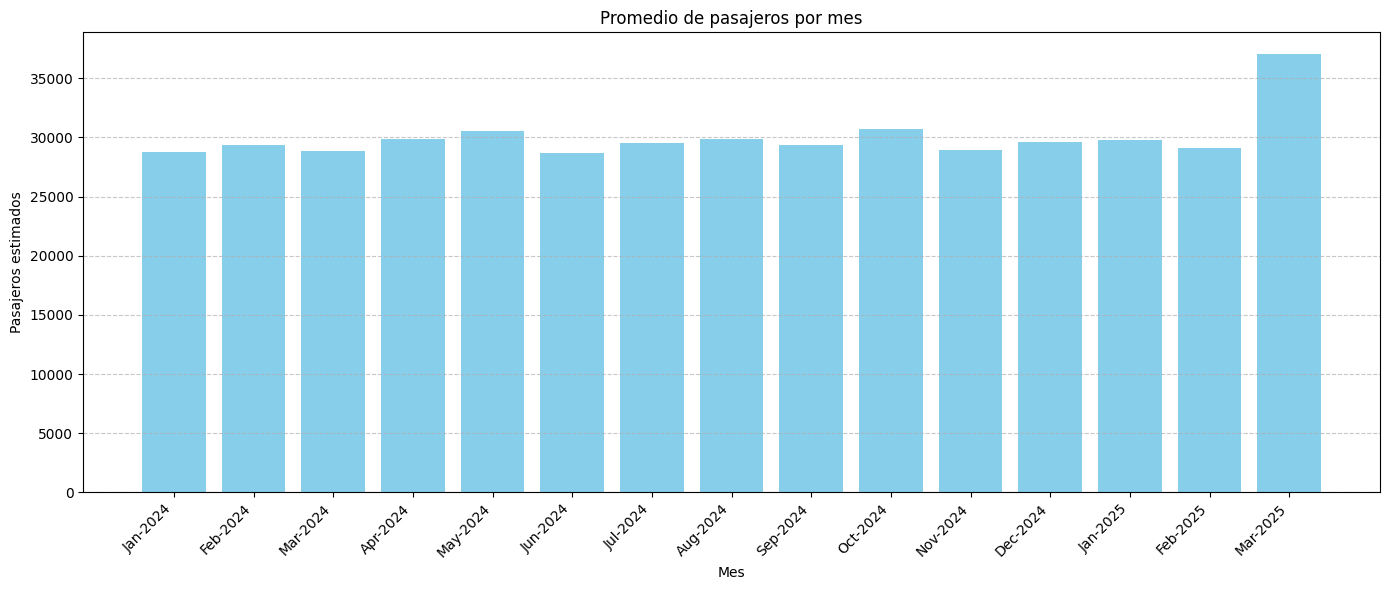

In [9]:
# Crear columna de fecha real
df_pasajeros['fecha'] = pd.to_datetime({
    'year': df_pasajeros['Año'],
    'month': df_pasajeros['Mes'],
    'day': 1
})

# Crear etiqueta bonita para mostrar
df_pasajeros['Mes-Año'] = df_pasajeros['fecha'].dt.strftime('%b-%Y') # el strftime le da un formato a una fecha que esta en string para que se vea en este caso mese y anio

# Agrupar por fecha real, no por string
pasajeros_por_mes = df_pasajeros.groupby('fecha')['pasajerosTotal_estimada'].mean().sort_index()

# Crear etiquetas para mostrar en el eje x
etiquetas = pasajeros_por_mes.index.strftime('%b-%Y')

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))  # más ancho
plt.bar(etiquetas, pasajeros_por_mes.values, color='skyblue')
plt.title('Promedio de pasajeros por mes')
plt.ylabel('Pasajeros estimados')
plt.xlabel('Mes')
plt.xticks(rotation=45, ha='right')  # rotación y alineación
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [12]:
min_mes = pasajeros_por_mes.idxmin()
min_valor = pasajeros_por_mes.min()
print(f"La menor demanda fue en {min_mes.strftime('%B %Y')} con un promedio de {min_valor:.0f} pasajeros.")


La menor demanda fue en June 2024 con un promedio de 28703 pasajeros.


In [21]:
grouped = df_pasajeros.groupby('Código Ruta')['pasajerosTotal_estimada']
print(grouped.std())
print(grouped.mean())
cv_por_ruta = (grouped.std() / grouped.mean()).sort_values(ascending=False)
print(cv_por_ruta.head(3))

Código Ruta
03          1583.805821
06          2734.452296
07         81681.151868
08          1274.785284
09         86659.672564
               ...     
I-3         1075.888311
I-4         9922.227013
I-5         6620.463023
I-6         2808.574423
PERMISO     8581.123322
Name: pasajerosTotal_estimada, Length: 265, dtype: float64
Código Ruta
03          14064.428571
06          37959.230769
07         135909.285714
08            886.808989
09          51967.802198
               ...      
I-3          1736.140351
I-4         17141.075000
I-5         22520.214286
I-6          3690.952381
PERMISO      9857.852941
Name: pasajerosTotal_estimada, Length: 265, dtype: float64
Código Ruta
731    1.942301
336    1.870524
142    1.835173
Name: pasajerosTotal_estimada, dtype: float64


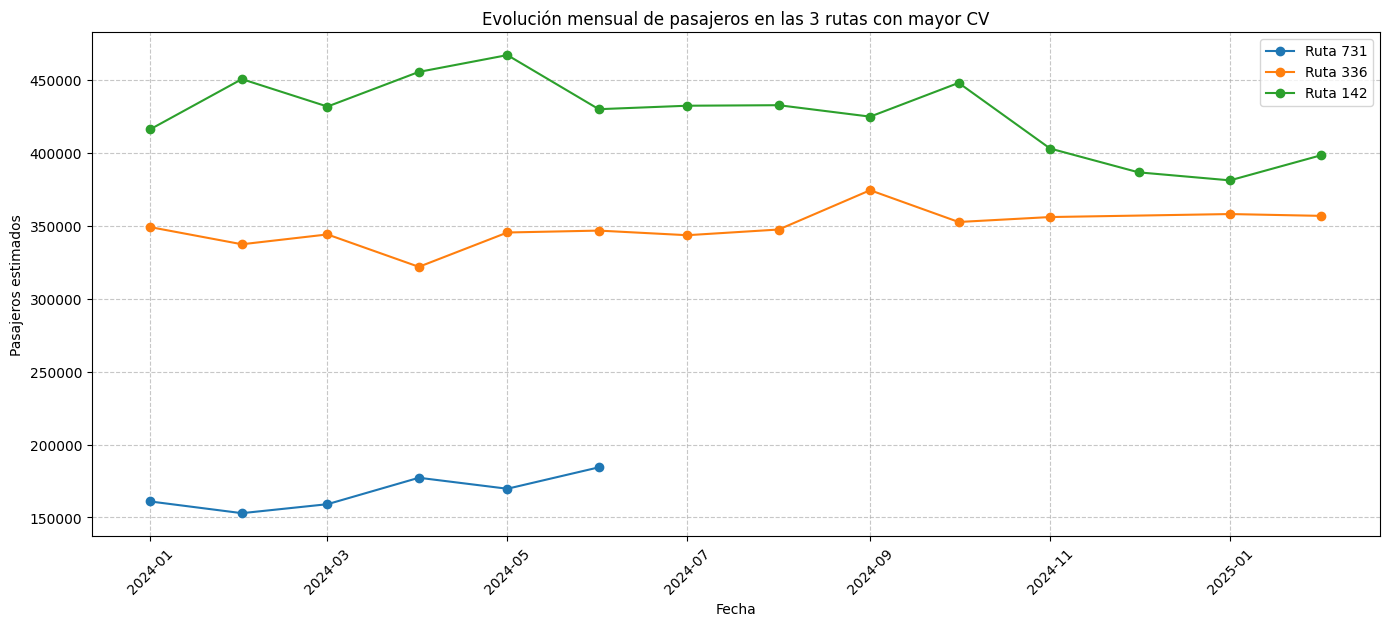

In [20]:
# tener datos de las rutas con mayor varianza
top3_rutas_cv = cv_por_ruta.head(3).index.tolist()
df_top3 = df_pasajeros[df_pasajeros['Código Ruta'].isin(top3_rutas_cv)].copy()



plt.figure(figsize=(14, 6))

for codigo in top3_rutas_cv:
    ruta_data = df_top3[df_top3['Código Ruta'] == codigo]
    ruta_data = ruta_data.groupby('fecha')['pasajerosTotal_estimada'].sum().sort_index()
    plt.plot(ruta_data.index, ruta_data.values, marker='o', label=f'Ruta {codigo}')

plt.title('Evolución mensual de pasajeros en las 3 rutas con mayor CV')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros estimados')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## Datos de las tarifas de los buses

In [ ]:
df_tarifas.info()


In [ ]:
df_pasajeros.describe()
df_pasajeros.shape


In [ ]:
df_tarifas.describe()
df_tarifas.shape

# Limpieza de los datos 

## Verificacion de nulls y eliminacion de columnas no necesarias en el analysis 


In [ ]:
df_pasajeros["fecha"] = pd.to_datetime(df_pasajeros["Año"].astype(str) + "-" + df_pasajeros["Mes"].astype(str) + "-01")
col_pasajeros = ["pasajeroEquivalente","pasajerosTotal","Año","Mes",]
df_pasajeros = df_pasajeros.drop(columns=col_pasajeros)
df_pasajeros

In [ ]:
df_tarifas = df_tarifas.iloc[:, :-8]  # Mantiene todas las filas y elimina las últimas 8 columnas
df_tarifas = df_tarifas.drop(columns=["Nombre Ruta"])
df_tarifas

## Eliminar nulos 

In [ ]:
df_pasajeros = df_pasajeros.dropna(subset=["Descripción Ramal"])


In [ ]:
df_tarifas = df_tarifas.dropna(subset=["Nombre Fraccionamiento"])

## Convertir en minuscula y eliminar caracteres especiales



In [ ]:
import re

In [ ]:
# Function for text preprocessing
def preprocess_text(text):
    try:
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    except:
        print("error found")
    return text

In [ ]:
df_tarifas["Nombre Fraccionamiento"] = df_tarifas["Nombre Fraccionamiento"].apply(preprocess_text)
df_pasajeros["Descripción Ramal"] = df_pasajeros["Descripción Ramal"].apply(preprocess_text)

## Unificar datos 


In [ ]:
df_compare = pd.concat([
    df_pasajeros["Descripción Ramal"].reset_index(drop=True),
    df_tarifas["Nombre Fraccionamiento"].reset_index(drop=True)
], axis=1)

df_compare = df_compare.sort_values(by=["Descripción Ramal", "Nombre Fraccionamiento"])
df_compare

In [ ]:

df = pd.merge(df_tarifas, df_pasajeros, right_on=["Código Ruta", "Descripción Ramal"], left_on=["Código Ruta", "Nombre Fraccionamiento"], how="inner")

In [ ]:
df_tarifas.shape



In [ ]:
df_pasajeros.shape

In [ ]:
df.shape

In [ ]:
df

# Modelo de predicción de ingresos mensuales


In [ ]:
# con este mdelo los operadores podrian proyectar y manejar mejor sus finanzas segun los ingresos promedio por mes 
# referencia https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

from sklearn.model_selection import train_test_split # se utiliza para dejar records para entrenar el modelo y otros para testearlo
from sklearn.ensemble import RandomForestRegressor # se usa como modelo que me permite entender los patrones en mis datos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # sirve para comparar los resultados del modelo con los resultados actuales y ver que tan buenos o malos son

In [ ]:
print(df.isna().sum())

In [ ]:
df= df.dropna()
print(df.isna().sum())

In [ ]:
# Convertir la columna de fecha a tipo datetime
df["fecha"] = pd.to_datetime(df["fecha"])
df["pasajeros_totales"] = df["Pasajeros Adulto Mayor"]  + df["Pasajeros Regulares"]  

features = ["Pasajeros Adulto Mayor", "Pasajeros Regulares", "Carreras", "Tarifa Regular (¢)", "Km por Viaje (Promedio)"]
X = df[features]
y = df["Ingresos"]

In [ ]:
# 1. Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



In [ ]:
# 3. Hacer predicciones
y_pred = model.predict(X_test)

# 4. Evaluar el modelo
print("MAE:", mean_absolute_error(y_test, y_pred))  #explicacion de que s MAE
print("MSE:", mean_squared_error(y_test, y_pred))  # expliaciond e que es MSE
print("R2 Score:", r2_score(y_test, y_pred))


In [ ]:
import matplotlib.pyplot as plt # mathplot lib me ayuda a graficar
import seaborn as sns # me ayuda a crear visualizacion mas complejas

# 5. Visualizar resultados (opcional)
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Ingresos reales")
plt.ylabel("Ingresos predichos")
plt.title("Ingresos: reales vs predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Modelo de Predicción de cantidad de pasajeros


## Nos hemos dado cuenta que los ingresos es una variable calculada y que si relamente quedemos predecir los ingresos de un mes futuro lo que devemos hacer es predecir la cantidad de personas que usan el medio de transporte cada mes por cada operador
## Acontinuacion haremos un modelo para predecir la cantidad de pasajeros



In [ ]:
# 2. Extraer características temporales
df["año"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["mes_ano"] = df["fecha"].dt.to_period('M').dt.to_timestamp()

# 3. Agrupar por operador y mes
df_agg = df.groupby(["Nombre Operador", "mes_ano"]).agg({
    "pasajeros_totales": "sum"
}).reset_index()

# Crear nuevas columnas de año y mes
df_agg["año"] = df_agg["mes_ano"].dt.year
df_agg["mes"] = df_agg["mes_ano"].dt.month

df_agg

In [ ]:
import numpy as np
# 4. Obtener los 5 operadores con más pasajeros acumulados
top_operadores = df_agg.groupby("Nombre Operador")["pasajeros_totales"].sum().nlargest(5).index
print(top_operadores)


# 4. Predecir por operador
for operador in top_operadores:
    df_op = df_agg[df_agg["Nombre Operador"] == operador]

    # Variables predictoras y objetivo
    X = df_op[["año", "mes"]]
    y = df_op["pasajeros_totales"]

    # Modelo ML
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X, y)

    # 5. Crear fechas futuras para predecir próximos 6 meses
    last_date = df_op["mes_ano"].max()
    future_months = pd.date_range(last_date + pd.offsets.MonthBegin(), periods=6, freq='MS')
    future_df = pd.DataFrame({
        "mes_ano": future_months,
        "año": future_months.year,
        "mes": future_months.month
    })

    # Predicción
    future_df["predicted_pasajeros"] = model.predict(future_df[["año", "mes"]])
    future_df["Nombre Operador"] = operador

    # Unión para graficar
    df_plot = pd.concat([
        df_op[["mes_ano", "pasajeros_totales"]].rename(columns={"pasajeros_totales": "pasajeros"}),
        future_df[["mes_ano", "predicted_pasajeros"]].rename(columns={"predicted_pasajeros": "pasajeros"})
    ])
    df_plot["Tipo"] = ["Real"] * len(df_op) + ["Predicción"] * len(future_df)

    # 6. Graficar
    plt.figure(figsize=(10, 5))
    for tipo in ["Real", "Predicción"]:
        datos = df_plot[df_plot["Tipo"] == tipo]
        plt.plot(datos["mes_ano"], datos["pasajeros"], label=tipo)

    plt.title(f"Predicción de Pasajeros - {operador}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de Pasajeros")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    
    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📊 Métricas para {operador}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.3f}")
